In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
from keras.optimizers import Adam

In [6]:
company='F'
start_time=dt.datetime(2012,1,1)
end=dt.datetime(2021,1,1)

data=web.DataReader(company,'yahoo',start_time,end)
print(data)

RemoteDataError: ignored

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data['Adj Close'].values.reshape(-1,1))

In [ ]:
pred=60
x_train=[]
y_train=[]
for x in range(pred,len(scaled_data)):
  x_train.append(scaled_data[x-pred:x,0])
  y_train.append(scaled_data[x,0])

x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
model=Sequential()
model.add(LSTM(units=60, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [ ]:
model.compile(loss='mean_squared_error',optimizer=Adam(0.01))
model.fit(x_train,y_train,epochs=30,batch_size=32)

Epoch 1/30
69/69 [==============================] - 26s 87ms/step - loss: 0.2271
Epoch 2/30
69/69 [==============================] - 6s 87ms/step - loss: 0.0060
Epoch 3/30
69/69 [==============================] - 6s 86ms/step - loss: 0.0043
Epoch 4/30
69/69 [==============================] - 6s 87ms/step - loss: 0.0042
Epoch 5/30
69/69 [==============================] - 6s 87ms/step - loss: 0.0034
Epoch 6/30
69/69 [==============================] - 6s 88ms/step - loss: 0.0031
Epoch 7/30
69/69 [==============================] - 6s 88ms/step - loss: 0.0030
Epoch 8/30
69/69 [==============================] - 6s 86ms/step - loss: 0.0029
Epoch 9/30
69/69 [==============================] - 6s 87ms/step - loss: 0.0029
Epoch 10/30
69/69 [==============================] - 6s 86ms/step - loss: 0.0024
Epoch 11/30
69/69 [==============================] - 6s 85ms/step - loss: 0.0029
Epoch 12/30
69/69 [==============================] - 6s 87ms/step - loss: 0.0024
Epoch 13/30
69/69 [=================

In [ ]:
test_start=dt.datetime(2020,1,1)
test_end=dt.datetime.now()
test_data=web.DataReader(company,'yahoo',test_start,test_end)
actual=test_data['Adj Close'].values
total=pd.concat((data['Adj Close'],test_data['Adj Close']),axis=0)

inp=total[len(total)-len(test_data)-pred:].values
inp= inp.reshape(-1,1)
inp=scaler.transform(inp)


x_test=[]

for x in range(pred,len(inp)):
  x_test.append(inp[x-pred:x,0])


x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

pred_prices=model.predict(x_test)
pred_prices=scaler.inverse_transform(pred_prices)


No handles with labels found to put in legend.


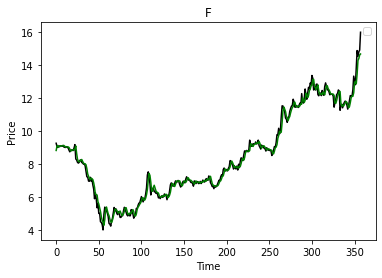

In [ ]:
plt.plot(actual,color='black')
plt.plot(pred_prices,color='green')
plt.title(f'{company}')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
real=[inp[len(inp)+1-pred:len(inp+1),0]]
real=np.array(real)
real=np.reshape(real,(real.shape[0],real.shape[1],1))

print(scaler.inverse_transform(real[-1]))

[[12.81000042]
 [13.36999989]
 [13.19999981]
 [12.48999977]
 [12.68999958]
 [12.48999977]
 [12.82999992]
 [12.85000038]
 [12.21000004]
 [12.14000034]
 [12.31999969]
 [12.30000019]
 [12.14999962]
 [12.46000004]
 [12.25      ]
 [12.17000008]
 [12.69999981]
 [12.92000008]
 [12.72999954]
 [12.51000023]
 [12.51000023]
 [12.38000011]
 [12.19999981]
 [12.23999977]
 [12.23999977]
 [12.22999954]
 [12.10999966]
 [11.44999981]
 [11.72999954]
 [11.93999958]
 [12.22000027]
 [12.27000046]
 [12.48999977]
 [12.43000031]
 [11.26000023]
 [11.53999996]
 [11.63000011]
 [11.40999985]
 [11.60999966]
 [11.73999977]
 [11.81999969]
 [11.71000004]
 [11.57999992]
 [11.32999992]
 [11.55000019]
 [11.84000015]
 [12.14999962]
 [12.14000034]
 [12.10999966]
 [12.48999977]
 [13.32999992]
 [13.06000042]
 [12.81000042]
 [13.89999962]
 [14.88000011]
 [14.52999973]
 [14.81000042]
 [14.90999985]
 [15.98999977]]


In [ ]:
prediction=model.predict(real)
prediction=scaler.inverse_transform(prediction)
print(prediction)

[[15.372836]]
